In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


number of images in train folder

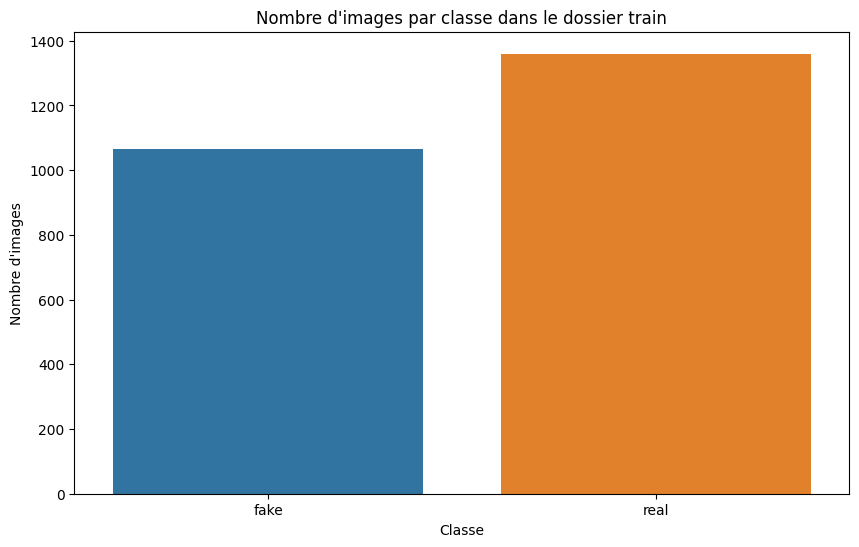

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des classes
classes = ['fake', 'real']

# Dictionnaire pour stocker le nombre d'images par classe
image_count = {}

# Parcourir chaque classe et compter le nombre d'images
for classe in classes:
    class_path = os.path.join("/content/drive/MyDrive/Ai_Or_Not/Cross_validation/train", classe)
    num_images = len(os.listdir(class_path))
    image_count[classe] = num_images

# Visualiser le nombre d'images par classe
plt.figure(figsize=(10, 6))
sns.barplot(x=list(image_count.keys()), y=list(image_count.values()))
plt.title('Nombre d\'images par classe dans le dossier train')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'images')
plt.show()

number of images in validation folder

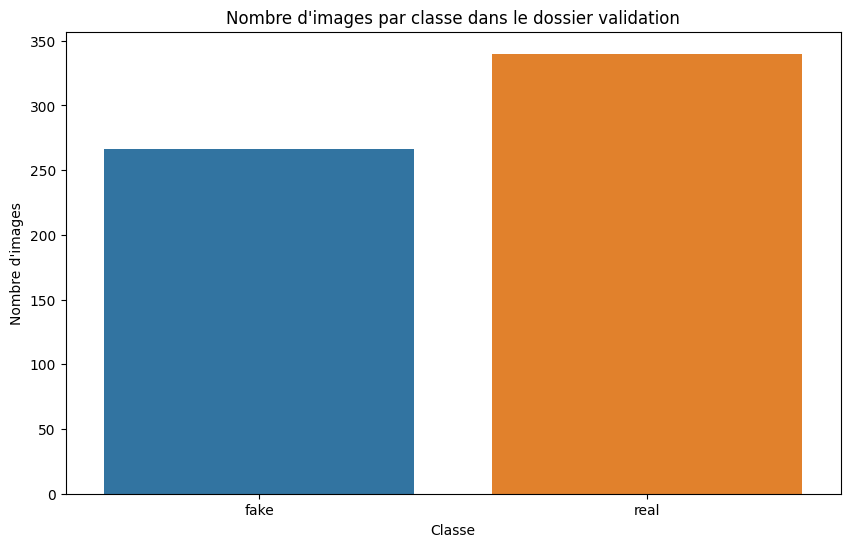

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des classes
classes = ['fake', 'real']

# Dictionnaire pour stocker le nombre d'images par classe
image_count = {}

# Parcourir chaque classe et compter le nombre d'images
for classe in classes:
    class_path = os.path.join("/content/drive/MyDrive/Ai_Or_Not/Cross_validation/validation", classe)
    num_images = len(os.listdir(class_path))
    image_count[classe] = num_images

# Visualiser le nombre d'images par classe
plt.figure(figsize=(10, 6))
sns.barplot(x=list(image_count.keys()), y=list(image_count.values()))
plt.title('Nombre d\'images par classe dans le dossier validation')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'images')
plt.show()

Load the CNN architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Création du modèle
model = Sequential()

# Couche de convolution 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

# Couche de convolution 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Couche de convolution 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Aplatir les features en un vecteur
model.add(Flatten())

# Couche fully connected 1
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour régularisation

# Couche fully connected 2
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Couche de sortie avec activation sigmoid pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Afficher la structure du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0


**Data preprocessing & Augmentation**
Data preprocessing & Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2


# Create an image generator with augmentation operations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.3,
    rotation_range=30,  # Rotation range
)

# Generator for training data
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Ai_Or_Not/Cross_validation/train",
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='binary',  # Change to 'binary' for binary classification
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    "/content/drive/MyDrive/Ai_Or_Not/Cross_validation/validation",
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='binary',  # Change to 'binary' for binary classification
)

Found 2424 images belonging to 2 classes.
Found 606 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import math

# Define the ModelCheckpoint callback
checkpoint_path = '/content/drive/MyDrive/Ai_Or_Not/Cross_validation' + '/best_model.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Calculate steps_per_epoch
steps_per_epoch = math.ceil(len(train_generator) / train_generator.batch_size)

# Calculate validation_steps
validation_steps = math.ceil(len(validation_generator) / validation_generator.batch_size)

# Use the callback when calling fit_generator
hist = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=70,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint]
)


<ipython-input-4-8a74b8cc870a>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/70
3/3 [==============================] - ETA: 0s - loss: 1.7641 - accuracy: 0.4792
Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to /content/drive/MyDrive/Ai_Or_Not/Cross_validation/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 62s 18s/step - loss: 1.7641 - accuracy: 0.4792 - val_loss: 0.7551 - val_accuracy: 0.3750
Epoch 2/70
3/3 [==============================] - ETA: 0s - loss: 0.7310 - accuracy: 0.4896
Epoch 2: val_accuracy improved from 0.37500 to 0.68750, saving model to /content/drive/MyDrive/Ai_Or_Not/Cross_validation/best_model.h5
3/3 [==============================] - 53s 23s/step - loss: 0.7310 - accuracy: 0.4896 - val_loss: 0.6284 - val_accuracy: 0.6875
Epoch 3/70
3/3 [==============================] - ETA: 0s - loss: 0.7233 - accuracy: 0.3958
Epoch 3: val_accuracy did not improve from 0.68750
3/3 [==============================] - 47s 19s/step - loss: 0.7233 - accuracy: 0.3958 - val_loss: 0.6912 - val_accuracy: 0.4688
Epoch 4/70
3/3 [==============================] - ETA: 0s - loss: 0.6879 - accuracy: 0.5625
Epoch 4: val_accuracy did not improve from 0.68750
3/3 [==============================] - 36s 16s/step - loss: 0.6879 - accuracy: 0.5625 - val_loss: 0.66

metrics

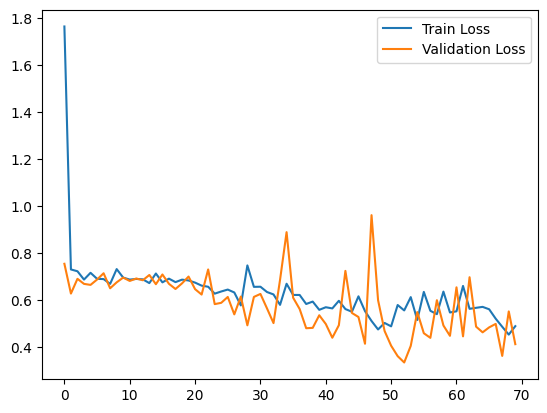

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

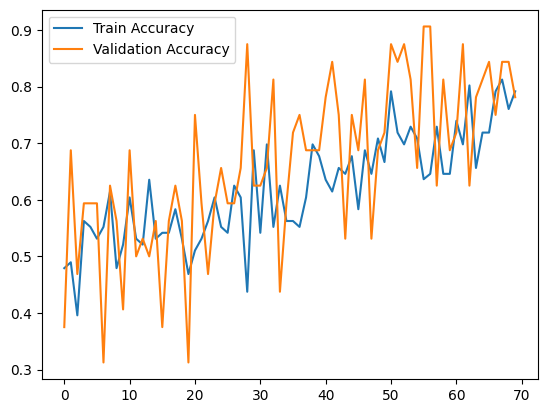

In [ ]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

prediction

In [ ]:
from tensorflow.keras.models import load_model

# Chemin vers le modèle enregistré
model_path = '/content/drive/MyDrive/Ai_Or_Not/Cross_validation/best_model.h5'

# Charger le modèle
loaded_model = load_model(model_path)


1/1 [==============================] - 0s 441ms/step


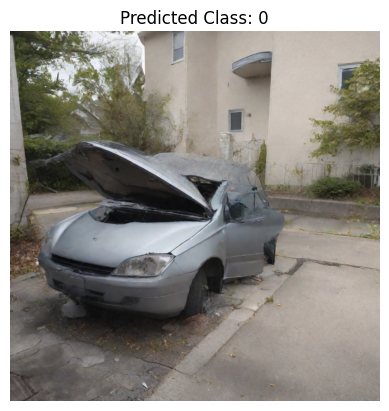

Predicted Class: fake


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    # Charger l'image en utilisant OpenCV
    img = cv2.imread(image_path)
    # Convertir l'image en RGB (si elle est en BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Redimensionner l'image
    img = cv2.resize(img, target_size)
    # Normaliser les valeurs des pixels
    img = img / 255.0
    # Ajouter une dimension pour créer un lot (batch) d'une seule image
    img = np.expand_dims(img, axis=0)
    return img

def predict_with_model(model, image_path, target_size=(224, 224)):
    # Prétraiter l'image
    preprocessed_image = preprocess_image(image_path, target_size)

    # Faire une prédiction avec le modèle
    predictions = model.predict(preprocessed_image)

    # Récupérer la classe prédite
    predicted_class = int(predictions[0][0] > 0.5)  # Assuming threshold of 0.5 for binary classification

    # Charger l'image pour l'afficher
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Afficher l'image avec la prédiction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Utilisation de la fonction pour prédire une image
image_path_to_predict = "/content/386468493_740982384513635_1889106897922038039_n.png"
predicted_class = predict_with_model(loaded_model, image_path_to_predict)

# Mapping predicted class to class labels
class_labels = {0: "fake", 1: "real"}  # Replace with your actual class labels

# Get the predicted class label
predicted_class_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_class_label}")


1/1 [==============================] - 0s 61ms/step


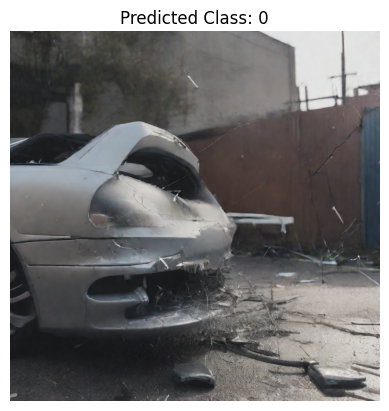

Predicted Class: fake


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    # Charger l'image en utilisant OpenCV
    img = cv2.imread(image_path)
    # Convertir l'image en RGB (si elle est en BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Redimensionner l'image
    img = cv2.resize(img, target_size)
    # Normaliser les valeurs des pixels
    img = img / 255.0
    # Ajouter une dimension pour créer un lot (batch) d'une seule image
    img = np.expand_dims(img, axis=0)
    return img

def predict_with_model(model, image_path, target_size=(224, 224)):
    # Prétraiter l'image
    preprocessed_image = preprocess_image(image_path, target_size)

    # Faire une prédiction avec le modèle
    predictions = model.predict(preprocessed_image)

    # Récupérer la classe prédite
    predicted_class = int(predictions[0][0] > 0.5)  # Assuming threshold of 0.5 for binary classification

    # Charger l'image pour l'afficher
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Afficher l'image avec la prédiction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Utilisation de la fonction pour prédire une image
image_path_to_predict = "/content/387495483_358109766700766_7212658623680572163_n.png"
predicted_class = predict_with_model(loaded_model, image_path_to_predict)

# Mapping predicted class to class labels
class_labels = {0: "fake", 1: "real"}  # Replace with your actual class labels

# Get the predicted class label
predicted_class_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_class_label}")


1/1 [==============================] - 0s 30ms/step


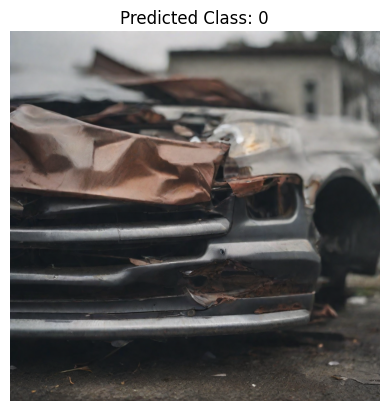

Predicted Class: fake


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    # Charger l'image en utilisant OpenCV
    img = cv2.imread(image_path)
    # Convertir l'image en RGB (si elle est en BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Redimensionner l'image
    img = cv2.resize(img, target_size)
    # Normaliser les valeurs des pixels
    img = img / 255.0
    # Ajouter une dimension pour créer un lot (batch) d'une seule image
    img = np.expand_dims(img, axis=0)
    return img

def predict_with_model(model, image_path, target_size=(224, 224)):
    # Prétraiter l'image
    preprocessed_image = preprocess_image(image_path, target_size)

    # Faire une prédiction avec le modèle
    predictions = model.predict(preprocessed_image)

    # Récupérer la classe prédite
    predicted_class = int(predictions[0][0] > 0.5)  # Assuming threshold of 0.5 for binary classification

    # Charger l'image pour l'afficher
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Afficher l'image avec la prédiction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Utilisation de la fonction pour prédire une image
image_path_to_predict = "/content/370294840_901007531369252_5032194580765927599_n.png"
predicted_class = predict_with_model(loaded_model, image_path_to_predict)

# Mapping predicted class to class labels
class_labels = {0: "fake", 1: "real"}  # Replace with your actual class labels

# Get the predicted class label
predicted_class_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_class_label}")


1/1 [==============================] - 0s 57ms/step


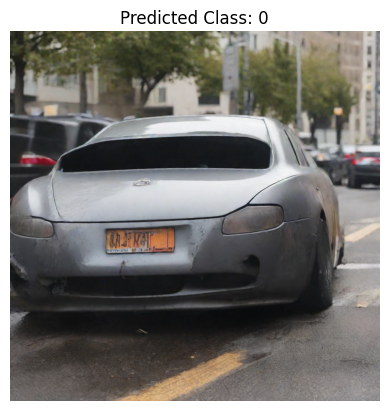

Predicted Class: fake


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    # Charger l'image en utilisant OpenCV
    img = cv2.imread(image_path)
    # Convertir l'image en RGB (si elle est en BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Redimensionner l'image
    img = cv2.resize(img, target_size)
    # Normaliser les valeurs des pixels
    img = img / 255.0
    # Ajouter une dimension pour créer un lot (batch) d'une seule image
    img = np.expand_dims(img, axis=0)
    return img

def predict_with_model(model, image_path, target_size=(224, 224)):
    # Prétraiter l'image
    preprocessed_image = preprocess_image(image_path, target_size)

    # Faire une prédiction avec le modèle
    predictions = model.predict(preprocessed_image)

    # Récupérer la classe prédite
    predicted_class = int(predictions[0][0] > 0.5)  # Assuming threshold of 0.5 for binary classification

    # Charger l'image pour l'afficher
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Afficher l'image avec la prédiction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Utilisation de la fonction pour prédire une image
image_path_to_predict = "/content/371505732_721298919881226_8065131652312850169_n.png"
predicted_class = predict_with_model(loaded_model, image_path_to_predict)

# Mapping predicted class to class labels
class_labels = {0: "fake", 1: "real"}  # Replace with your actual class labels

# Get the predicted class label
predicted_class_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_class_label}")


1/1 [==============================] - 0s 31ms/step


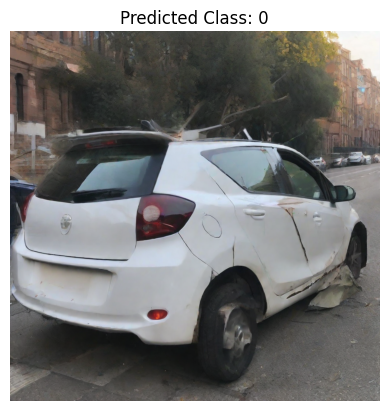

Predicted Class: fake


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    # Charger l'image en utilisant OpenCV
    img = cv2.imread(image_path)
    # Convertir l'image en RGB (si elle est en BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Redimensionner l'image
    img = cv2.resize(img, target_size)
    # Normaliser les valeurs des pixels
    img = img / 255.0
    # Ajouter une dimension pour créer un lot (batch) d'une seule image
    img = np.expand_dims(img, axis=0)
    return img

def predict_with_model(model, image_path, target_size=(224, 224)):
    # Prétraiter l'image
    preprocessed_image = preprocess_image(image_path, target_size)

    # Faire une prédiction avec le modèle
    predictions = model.predict(preprocessed_image)

    # Récupérer la classe prédite
    predicted_class = int(predictions[0][0] > 0.5)  # Assuming threshold of 0.5 for binary classification

    # Charger l'image pour l'afficher
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Afficher l'image avec la prédiction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Utilisation de la fonction pour prédire une image
image_path_to_predict = "/content/371491359_272289195401189_7634104703902135091_n.png"
predicted_class = predict_with_model(loaded_model, image_path_to_predict)

# Mapping predicted class to class labels
class_labels = {0: "fake", 1: "real"}  # Replace with your actual class labels

# Get the predicted class label
predicted_class_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_class_label}")


1/1 [==============================] - 0s 27ms/step


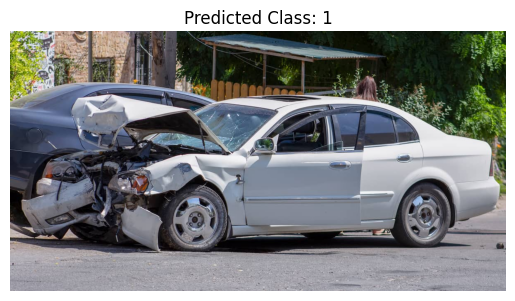

Predicted Class: real


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    # Charger l'image en utilisant OpenCV
    img = cv2.imread(image_path)
    # Convertir l'image en RGB (si elle est en BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Redimensionner l'image
    img = cv2.resize(img, target_size)
    # Normaliser les valeurs des pixels
    img = img / 255.0
    # Ajouter une dimension pour créer un lot (batch) d'une seule image
    img = np.expand_dims(img, axis=0)
    return img

def predict_with_model(model, image_path, target_size=(224, 224)):
    # Prétraiter l'image
    preprocessed_image = preprocess_image(image_path, target_size)

    # Faire une prédiction avec le modèle
    predictions = model.predict(preprocessed_image)

    # Récupérer la classe prédite
    predicted_class = int(predictions[0][0] > 0.5)  # Assuming threshold of 0.5 for binary classification

    # Charger l'image pour l'afficher
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Afficher l'image avec la prédiction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Utilisation de la fonction pour prédire une image
image_path_to_predict = "/content/who-pays-for-car-damage-in-no-fault-state.jpg"
predicted_class = predict_with_model(loaded_model, image_path_to_predict)

# Mapping predicted class to class labels
class_labels = {0: "fake", 1: "real"}  # Replace with your actual class labels

# Get the predicted class label
predicted_class_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_class_label}")


1/1 [==============================] - 0s 21ms/step


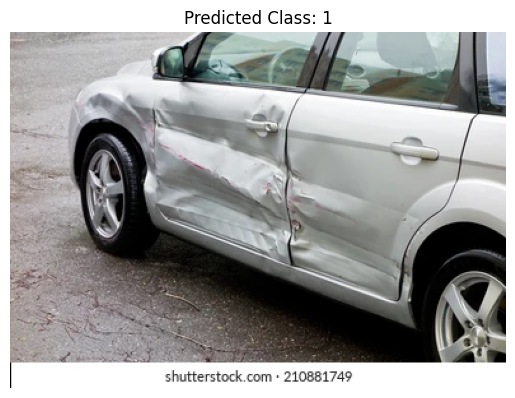

Predicted Class: real


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    # Charger l'image en utilisant OpenCV
    img = cv2.imread(image_path)
    # Convertir l'image en RGB (si elle est en BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Redimensionner l'image
    img = cv2.resize(img, target_size)
    # Normaliser les valeurs des pixels
    img = img / 255.0
    # Ajouter une dimension pour créer un lot (batch) d'une seule image
    img = np.expand_dims(img, axis=0)
    return img

def predict_with_model(model, image_path, target_size=(224, 224)):
    # Prétraiter l'image
    preprocessed_image = preprocess_image(image_path, target_size)

    # Faire une prédiction avec le modèle
    predictions = model.predict(preprocessed_image)

    # Récupérer la classe prédite
    predicted_class = int(predictions[0][0] > 0.5)  # Assuming threshold of 0.5 for binary classification

    # Charger l'image pour l'afficher
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Afficher l'image avec la prédiction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Utilisation de la fonction pour prédire une image
image_path_to_predict = "/content/damaged-silver-car-scratches-on-260nw-210881749.webp"
predicted_class = predict_with_model(loaded_model, image_path_to_predict)

# Mapping predicted class to class labels
class_labels = {0: "fake", 1: "real"}  # Replace with your actual class labels

# Get the predicted class label
predicted_class_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_class_label}")
